# Regression

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, LinearRegression, Lasso, RidgeCV, LassoCV

% matplotlib inline
 

## Importar Datos 

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                 'python-machine-learning-book-2nd-edition'
                 '/master/code/ch10/housing.data.txt',
                 header=None,
                 sep='\s+')

df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS', 
              'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
              'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null int64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null int64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(12), int64(2)
memory usage: 55.4 KB


## Analisis Exploratorio 

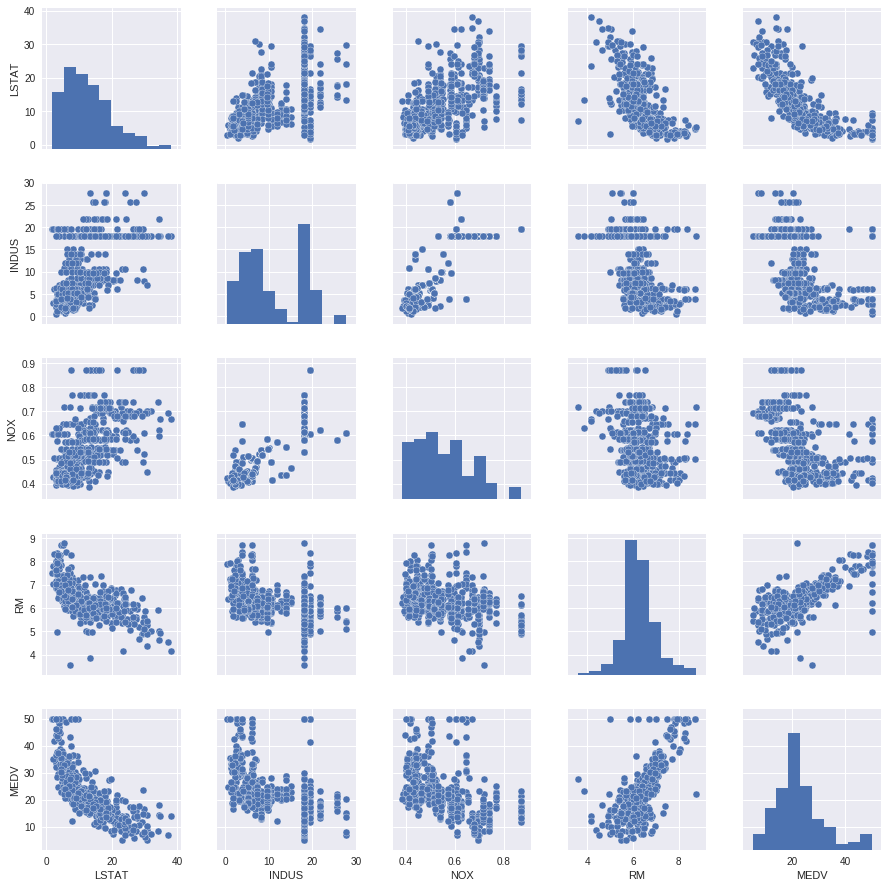

In [5]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

sns.pairplot(df[cols], size=2.5)
plt.tight_layout()
plt.show()

Heat map

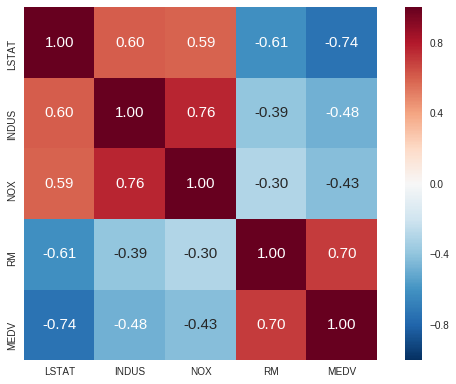

In [6]:
# Correlacion
cm = np.corrcoef(df[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 15},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()

## Modelo de Regresion Lineal

En esta parte crearemos un modelo de regresion lineal dede cero implementando el Gradiente decendiente como algoritmo de optimizacion

In [0]:
class RegressionLinealGD(object):
  """Modelo de Regresion Lineal """
  
  def __init__(self,lr=0.001, num_iter=100):
    self.lr=lr # Learning rate
    self.num_iter=num_iter # Numero de iteraciones
  
  def fit(self, X, y):
    
    # Weights o Parametros 
    self.W= np.zeros((1,1)) # Forma (2,1)
    self.b=0 # bias o ordenada en el origen
    
    # Cost o Error
    self.cost=[]
    
    # Gradient Descent 
    for i in range(self.num_iter):
      # Linear transformation y= WX + b
      y_pred = self.Linear(X)
      
      # Gradients 
      self.W += - self.lr*X.T @ (y_pred - y) # W := W - a*X.T(Ypred-Y)
      self.b += - self.lr*np.sum(y_pred - y) # b := b - a*Sum(Ypred-Y) 
      self.cost.append(self.LossFn(y_pred,y))
      print(f"Error {self.cost[i]}")
      
    return self
      
  def Linear(self,X):
    """ Linear Transformation y= WX + b"""
    y= X @ self.W  + self.b 
    return y
  
  def LossFn(self,y_pred, y):
    """ Funcion de Error con el Error Cuadratico medio (MSE)"""
    m=len(y) # numero de ejemplor
    loss= np.sum((y_pred-y).T@(y_pred-y))/(2*m)
    return loss
      
  def predict(self, X):
    return self.Linear(X)

Datos de entrenamiento

In [8]:
# Datos de Entrenamiento
X = df[['RM']].values
y = df['MEDV'].values
y=y[:,np.newaxis]
print(f'Forma de X :{X.shape}') 
print(f'Forma de y: {y.shape}')

Forma de X :(506, 1)
Forma de y: (506, 1)


### Normalizar 

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
print(f'forma X {X_std.shape}')
print(f'forma Y {y_std.shape}')

forma X (506, 1)
forma Y (506, 1)


## Modelo 

In [19]:
# Modelo
LinearR=RegressionLinealGD(lr=0.001,num_iter=50)

# Entrenamiento 
LinearR.fit(X_std, y_std)  

Error 0.5
Error 0.3172360810934835
Error 0.2726351053792128
Error 0.2617508616698052
Error 0.25909471437193615
Error 0.25844651880995334
Error 0.25828833575778937
Error 0.2582497333984715
Error 0.25824031303311296
Error 0.25823801412483227
Error 0.25823745310845114
Error 0.2582373162002575
Error 0.25823728278972957
Error 0.258237274636358
Error 0.25823727264664176
Error 0.2582372721610794
Error 0.25823727204258473
Error 0.2582372720136678
Error 0.25823727200661095
Error 0.2582372720048889
Error 0.2582372720044686
Error 0.258237272004366
Error 0.25823727200434105
Error 0.258237272004335
Error 0.2582372720043334
Error 0.258237272004333
Error 0.258237272004333
Error 0.258237272004333
Error 0.2582372720043329
Error 0.25823727200433294
Error 0.2582372720043329
Error 0.2582372720043329
Error 0.2582372720043329
Error 0.25823727200433294
Error 0.258237272004333
Error 0.258237272004333
Error 0.25823727200433294
Error 0.25823727200433294
Error 0.25823727200433294
Error 0.25823727200433294
Error 

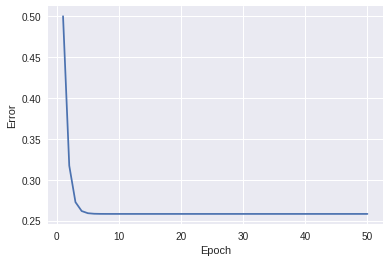

In [20]:
# Graficar
plt.plot(range(1, LinearR.num_iter+1), LinearR.cost)
plt.ylabel('Error')
plt.xlabel('Epoch')
plt.show()

In [0]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)    
    return

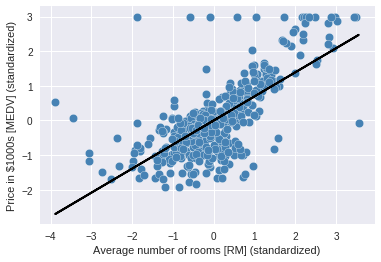

In [23]:
lin_regplot(X_std, y_std, LinearR)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

In [48]:
print(f'Weight o Pendiente: {LinearR.W[0]} ')
print(f'Bias o ordenada en el origen: {LinearR.W[1]} ')

Weight o Pendiente: [0.69535995] 
Bias o ordenada en el origen: [-4.8316906e-16] 


## Regresion Lineal con SckitLearn 

In [10]:
from sklearn.linear_model import LinearRegression

linearReg=LinearRegression()

# Train model
linearReg.fit(X_std,y_std)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
print(f'Weight o Pendiente: {linearReg.coef_[0]} ')
print(f'Bias o ordenada en el origen: {linearReg.intercept_} ')

Weight o Pendiente: [0.69535995] 
Bias o ordenada en el origen: [-4.43892061e-16] 


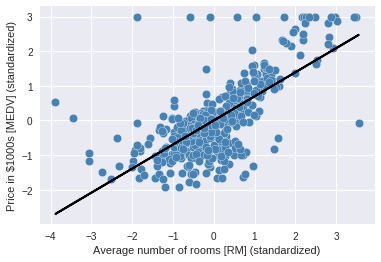

In [24]:
lin_regplot(X_std, y_std, linearReg)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000s [MEDV] (standardized)')
plt.show()

 ###  Cross- Validation
 Esto sirve para evaluar tu modelo y saber si puede generalizar mejor con nuevos datos ya que si solo lo entrenamos con los datos completos el modelo puede tender a overfitting o aprender de memoria los datos y por lo tanto no generalizar.
 
 ![alt text](https://i0.wp.com/blog.contactsunny.com/wp-content/uploads/2018/08/cross_validation.png?resize=415%2C316)

In [35]:
from sklearn.datasets import load_boston

boston = load_boston()
X, y = boston.data, boston.target

# Seleccionar Datos de entrenamiento y validacion
X_train, X_val, y_train, y_val= train_test_split(X, y, test_size=0.25, shuffle=True, random_state=42)

print("Shape: ")
print(f'X_train: {X_train.shape} ')
print(f'X_val: {X_val.shape} ')
print(f'y_train: {y_train.shape} ')
print(f'y_val: {y_val.shape} ')

Shape: 
X_train: (379, 13) 
X_val: (127, 13) 
y_train: (379,) 
y_val: (127,) 


In [32]:
# Promedio del resultado del cross validation
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=5))

0.7157231534790626

## Regression Polinomial
Para hacer  un modelo mas preciso podemos hacer uso de una regresion polinomial que lo que hace es que expande las caracteristicas de nuerstro modelo 

Por ejemplo: 

$$Y=b + W_1X + W_2X^2 + W_3X^3$$

Cuando estes tabajando con modelos polinomiales tienes que tener en cuenta que si tu modelo es muy complejo esto te puede llevar a overfittig que tambien es llamado alta varianza.

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05211042/overunder21.png)

Se dice que un modelo tiene alta varianza cuando:
* Aumenta la complejidad
* No generaliza bien con nuevos datos
* Bajo rendimiento en el conjunto de Validacion y Test

Se dice que tu modelo tiene alto Bias o sesgo cuando:
* No aprendio lo suficiente
* No tiene datos suficientes para aprender 
* Bajo rendimiento en el conjunto de entrenamiento

![alt text](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/06/05153246/bias-variance.png)

In [0]:

X = np.array([258.0, 270.0, 294.0, 
              320.0, 342.0, 368.0, 
              396.0, 446.0, 480.0, 586.0])\
             [:, np.newaxis]

y = np.array([236.4, 234.4, 252.8, 
              298.6, 314.2, 342.2, 
              360.8, 368.0, 391.2,
              390.8])

In [0]:
from sklearn.preprocessing import PolynomialFeatures

lr = LinearRegression()
pr = LinearRegression()

# Expandir Caracteristicas del dataset 
quadratic = PolynomialFeatures(degree=2)
# Normaliza 
X_quad = quadratic.fit_transform(X)

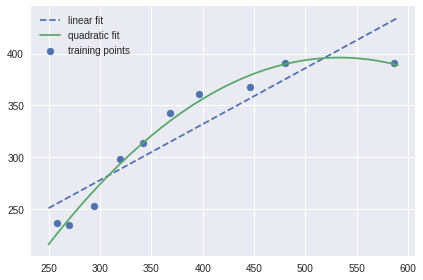

In [76]:
# Regresion Lineal
lr.fit(X, y)
X_fit = np.arange(250, 600, 10)[:, np.newaxis]
y_lin_fit = lr.predict(X_fit)

# Regresion polinomial en este caso cuadratica
pr.fit(X_quad, y)
y_quad_fit = pr.predict(quadratic.fit_transform(X_fit))

# Plot resultados
plt.scatter(X, y, label='training points')
plt.plot(X_fit, y_lin_fit, label='linear fit', linestyle='--')
plt.plot(X_fit, y_quad_fit, label='quadratic fit')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [0]:
# Predicir
y_lin_pred = lr.predict(X)
y_quad_pred = pr.predict(X_quad)

### Evaluar el modelo 
Regularmente se utiliza el MSE y la $R^2$ para evaluar el rendimiento de tu modelo.

* Un MSE bajo indica el error entonces un MSE cercano a cero indica un buen modelo
* $R^2$ cercana a 1 significa que tu modelo esta tomando en cuenta la mayoria de los datos  

In [80]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

print('MSE lineal: %.3f, Cuadratico: %.3f' % (
        mean_squared_error(y, y_lin_pred),
        mean_squared_error(y, y_quad_pred)))
print(' R^2 lineal: %.3f, Cuadratico: %.3f' % (
        r2_score(y, y_lin_pred),
        r2_score(y, y_quad_pred)))

MSE lineal: 569.780, Cuadratico: 61.330
 R^2 lineal: 0.832, Cuadratico: 0.982


Cross validation

In [56]:
from sklearn.preprocessing import scale

X, y = boston.data, boston.target
# Exapandimos las caracteristicas del modelo de regression Y= W1x + W2X^2 +W0 
X_poly = PolynomialFeatures(include_bias=False).fit_transform(scale(X))
print("X polinomial: ",X_poly.shape)

# Seleccionar Datos de entrenamiento y validacion
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, random_state=42)
print("Shape: ")
print(f'X_train: {X_train.shape} ')
print(f'X_val: {X_val.shape} ')
print(f'y_train: {y_train.shape} ')
print(f'y_val: {y_val.shape} ')

X polinomial:  (506, 104)
Shape: 
X_train: (379, 104) 
X_val: (127, 13) 
y_train: (379,) 
y_val: (127,) 


## Ridge Regression

Este tipo de regression agrega un parametro que reduce la complejidad de tu modelo para evitar overfittig esto quiere decir que penaliza los valores menos importantes a cero dejando solo los parametros mas relevantes para el sistema y que de esta forma pueda generalizar mejor con nuevos datos. 

Hace uso de dos componentes vectoriales 
####  Norma  Euclidiana 

Esta simplemente calcula la magnitud del vector 

$$
\lVert{{x}}_2\lVert=(\sum_i {x}_i^2)^{1/2}\Leftrightarrow \sqrt{\sum_i {x}_i^2}
$$

![](https://hadrienj.github.io/assets/images/2.5/l2-norm.png)

#### Norma Euclidiana Cuadratica  $L^2$ 

Eleva al cuadrado la norma euclidieana para hacer mas facil el calculo de los gradientes.

$$
\sum_i|{x}_i|^2
$$
![](https://hadrienj.github.io/assets/images/2.5/squared-L2-norm1.png)

Esta es muy usada en machine learning ya que su computacion se recuce a esto:  ${x}^\text{T}{x}$.


Tambien agrega un hyperparametro Lambda λ que penaliza los parametros.

* Un incremento en λ  implica que tu modelo reducira su complejidad, pero hay que tener mucho cuidado ya que si es muy alta puede llevarnos a underfitting (Tu modelo no aprende lo suficiente)
* Un decremento en λ cercano a cero significa que tu modelo es cercano al original no penaliza significativamente los parametros


$ Ypred= W_{i,j}\dot X_{i,j} + b $

$$
Error = \frac{1}{2m} \sum_{i=1}^{m}(Ypred - Yreal )^2 + λ{W^T \dot W }
$$7

### Grid search 
[Grid Searh](http://scikit-learn.org/stable/modules/grid_search.html) se utiliza para encontrar los hyperparametros mas optimos para tu modelo


In [58]:
from sklearn.model_selection import GridSearchCV
# matriz de parametros

param_grid={'alpha':np.logspace(-3,3,13)}


print("Parametros de LinearRegression: ", LinearRegression().get_params().keys())
print("Parametros de Ridge Regression", Ridge().get_params().keys())
print("Parametros de Lasso Regression",Lasso().get_params().keys())

Parametros de LinearRegression:  dict_keys(['copy_X', 'fit_intercept', 'n_jobs', 'normalize'])
Parametros de Ridge Regression dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'random_state', 'solver', 'tol'])
Parametros de Lasso Regression dict_keys(['alpha', 'copy_X', 'fit_intercept', 'max_iter', 'normalize', 'positive', 'precompute', 'random_state', 'selection', 'tol', 'warm_start'])


In [59]:
# Precision
np.set_printoptions(suppress=True, precision=3)

# Grid Search 
grid = GridSearchCV(Ridge(), param_grid, cv=3, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([   0.001  ,    0.00316,    0.01   ,    0.03162,    0.1    ,
          0.31623,    1.     ,    3.16228,   10.     ,   31.62278,
        100.     ,  316.22777, 1000.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [60]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.005130,0.000427,0.761958,0.956621,0.001,{'alpha': 0.001},11,0.710327,0.963453,0.815023,0.946725,0.760525,0.959684,0.003133,0.000080,0.042754,0.007164
1,0.004006,0.000474,0.764102,0.956512,0.00316228,{'alpha': 0.0031622776601683794},10,0.710818,0.963452,0.819795,0.946448,0.761692,0.959636,0.000032,0.000008,0.044523,0.007285
2,0.006330,0.001589,0.767007,0.956397,0.01,{'alpha': 0.01},9,0.712419,0.963442,0.824951,0.946155,0.763651,0.959594,0.002722,0.001210,0.046002,0.007411
3,0.004123,0.000506,0.772433,0.956160,0.0316228,{'alpha': 0.03162277660168379},8,0.717736,0.963370,0.832900,0.945617,0.766664,0.959494,0.000090,0.000005,0.047192,0.007621
4,0.004034,0.000506,0.782954,0.955561,0.1,{'alpha': 0.1},7,0.732567,0.962991,0.845514,0.944568,0.770783,0.959125,0.000180,0.000038,0.046907,0.007932
5,0.003844,0.000458,0.800113,0.954271,0.316228,{'alpha': 0.31622776601683794},6,0.762172,0.961710,0.860406,0.942877,0.777760,0.958227,0.000080,0.000010,0.043106,0.008182
6,0.004022,0.000470,0.823385,0.951734,1,{'alpha': 1.0},4,0.801216,0.958625,0.875911,0.939985,0.793028,0.956593,0.000181,0.000033,0.037292,0.008349
7,0.003898,0.000485,0.846558,0.946541,3.16228,{'alpha': 3.1622776601683795},3,0.833775,0.952303,0.888992,0.934068,0.816908,0.953252,0.000087,0.000040,0.030785,0.008828
8,0.003872,0.000466,0.858378,0.936928,10,{'alpha': 10.0},1,0.845872,0.940987,0.893066,0.923524,0.836198,0.946273,0.000133,0.000044,0.024843,0.009721
9,0.003956,0.000458,0.850477,0.919784,31.6228,{'alpha': 31.622776601683793},2,0.828767,0.922282,0.882605,0.905619,0.840058,0.931451,0.000163,0.000025,0.023181,0.010693


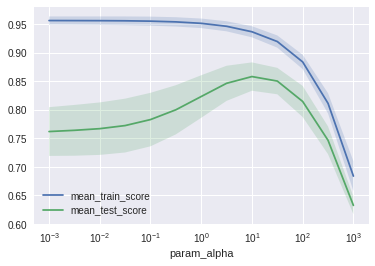

In [61]:

results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)

plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [62]:
print("El parametro mas optimo para alpha es: ",grid.best_params_)
print("Exactitud con el mejor parametro: ", grid.best_score_)

El parametro mas optimo para alpha es:  {'alpha': 10.0}
Exactitud con el mejor parametro:  0.8583784591978131


## Lasso Regression 

Este tipo de regression agrega un parametro que reduce la complejidad de tu modelo para evitar overfittig esto quiere decir que penaliza los valores menos importantes a cero dejando solo los parametros mas relevantes para el sistema y que de esta forma pueda generalizar mejor con nuevos datos. 


Para esto hace uso de la norma  $L^1$  

#### The $L^1$ norm

Esta norma de vector solo es la suma de los valores absolutos:

$$
\lVert{{x}}_1\lVert=\sum_{i} |{x}_i|
$$
![](https://hadrienj.github.io/assets/images/2.5/l1-norm.png)


Tambien agrega un hyperparametro Lambda λ que penaliza los parametros.

* Un incremento en λ  implica que tu modelo reducira su complejidad, pero hay que tener mucho cuidado ya que si es muy alta puede llevarnos a underfitting (Tu modelo no aprende lo suficiente)
* Un decremento en λ cercano a cero significa que tu modelo es cercano al original no penaliza significativamente los parametros


$ Ypred= W_{i,j}\dot X_{i,j} + b $

$$
Error = \frac{1}{2m} \sum_{i=1}^{m}(Ypred - Yreal )^2 + \lambda|\sum_{i=1}^{m}{W}_i|
$$


In [63]:
param_grid = {'alpha': np.logspace(-3, 0, 13)}
print(param_grid)

{'alpha': array([0.001, 0.002, 0.003, 0.006, 0.01 , 0.018, 0.032, 0.056, 0.1  ,
       0.178, 0.316, 0.562, 1.   ])}


In [64]:
# Aplicamos Grid Search
grid = GridSearchCV(Lasso(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000000.0,
   normalize=True, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([0.001  , 0.00178, 0.00316, 0.00562, 0.01   , 0.01778, 0.03162,
       0.05623, 0.1    , 0.17783, 0.31623, 0.56234, 1.     ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [65]:
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.062976,0.000317,0.839658,0.937601,0.001,{'alpha': 0.001},4,0.678814,0.938147,0.833526,...,0.902757,0.937189,0.884016,0.937866,0.796624,0.940772,0.025362,0.000058,0.071782,0.002487
1,0.019089,0.000283,0.850534,0.931540,0.00177828,{'alpha': 0.0017782794100389228},2,0.758039,0.931451,0.850466,...,0.898143,0.930843,0.889674,0.931753,0.801614,0.935076,0.002905,0.000021,0.064441,0.002529
2,0.010108,0.000264,0.853947,0.922508,0.00316228,{'alpha': 0.0031622776601683794},1,0.849783,0.922639,0.874980,...,0.885200,0.921515,0.891410,0.922215,0.797921,0.927341,0.001195,0.000017,0.069682,0.002818
3,0.008555,0.000253,0.844131,0.911142,0.00562341,{'alpha': 0.005623413251903491},3,0.901276,0.911002,0.886035,...,0.867400,0.911742,0.890764,0.911576,0.783083,0.915576,0.001977,0.000019,0.092812,0.003018
4,0.008270,0.000269,0.818665,0.890667,0.01,{'alpha': 0.01},5,0.882522,0.888504,0.874593,...,0.842620,0.892403,0.883413,0.891268,0.710222,0.891802,0.002321,0.000028,0.112257,0.003235
5,0.006041,0.000274,0.789362,0.864388,0.0177828,{'alpha': 0.01778279410038923},6,0.850068,0.861067,0.849063,...,0.817024,0.865360,0.877478,0.863941,0.640135,0.871089,0.002108,0.000024,0.135580,0.004888
6,0.005021,0.000293,0.769133,0.827530,0.0316228,{'alpha': 0.03162277660168379},7,0.824710,0.824725,0.789907,...,0.793713,0.828126,0.866360,0.824513,0.603061,0.836506,0.001883,0.000028,0.121295,0.009598
7,0.002562,0.000269,0.738202,0.771635,0.0562341,{'alpha': 0.05623413251903491},8,0.777885,0.765392,0.736390,...,0.753678,0.768081,0.821017,0.765531,0.573952,0.790077,0.000648,0.000026,0.095361,0.012579
8,0.001663,0.000284,0.665712,0.687314,0.1,{'alpha': 0.1},9,0.692163,0.684413,0.665655,...,0.652612,0.685360,0.723020,0.680761,0.552103,0.708674,0.000087,0.000021,0.071059,0.010885
9,0.001561,0.000279,0.488893,0.509372,0.177828,{'alpha': 0.1778279410038923},10,0.505451,0.508962,0.511143,...,0.477886,0.513172,0.514041,0.506611,0.408147,0.526598,0.000078,0.000043,0.068296,0.010873


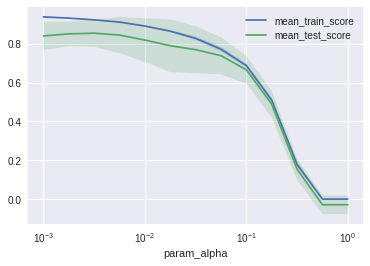

In [66]:
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)
plt.fill_between(results.param_alpha.astype(np.float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)
plt.legend()
plt.xscale("log")

In [67]:
print("El parametro mas optimo para alpha es: ",grid.best_params_)
print("Exactitud con el mejor parametro: ", grid.best_score_)

El parametro mas optimo para alpha es:  {'alpha': 0.0031622776601683794}
Exactitud con el mejor parametro:  0.8539468999083608


## Elastic Net
Este tipo de Regression hace uso de las normas $L^1$ y $L^2$ y junta los mejor de los dos mundos para tener un modelo mas robusto. 


$ Ypred= W_{i,j}\dot X_{i,j} + b $

$$
E = \frac{1}{2m} \sum_{i=1}^{m}(Ypred - Yreal )^2 + \lambda_1\sum_{i=1}^{m}|W| +  \lambda_2\sum_{i=1}^{m}W^2
$$


In [68]:
param_grid = {'alpha': np.logspace(-4, -1, 10), 'l1_ratio': [0.01, .1, .5, .9, .98, 1]}
print(param_grid)

{'alpha': array([0.   , 0.   , 0.   , 0.001, 0.002, 0.005, 0.01 , 0.022, 0.046,
       0.1  ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]}


In [69]:
from sklearn.linear_model import ElasticNet


grid = GridSearchCV(ElasticNet(normalize=True, max_iter=1e6), param_grid, cv=10, return_train_score=True, iid=False)
grid.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000000.0, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=False, n_jobs=1,
       param_grid={'alpha': array([0.0001 , 0.00022, 0.00046, 0.001  , 0.00215, 0.00464, 0.01   ,
       0.02154, 0.04642, 0.1    ]), 'l1_ratio': [0.01, 0.1, 0.5, 0.9, 0.98, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [70]:
print("El parametro mas optimo para alpha es: ", grid.best_params_)
print("Exactitud con el mejor parametro: ", grid.best_score_)

El parametro mas optimo para alpha es:  {'alpha': 0.001, 'l1_ratio': 0.9}
Exactitud con el mejor parametro:  0.8597823126140604


## Modelos Robustos
Por lo regular cuando trabajas con Regression tus modelos pueden ser suceptibles a outliers o datos muy duera de la desviacion estandar que afectan el rendimiento de tu modelo. Para esto hay otros tipos de modelos que atacan estas caracteristicas siendo mas robustos para los datos no deseados como los outliers

In [0]:
from sklearn.linear_model import HuberRegressor, RANSACRegressor
from sklearn.datasets import make_regression



In [0]:
# Crear Datos
n_samples = 1000
n_outliers = 50

X, y, coef = make_regression(n_samples=n_samples, n_features=1,
                                      n_informative=1, noise=10,
                                      coef=True, random_state=0)

# Agregar outliers
np.random.seed(0)
X[:n_outliers] = 3 + 0.5 * np.random.normal(size=(n_outliers, 1))
y[:n_outliers] = -3 + 10 * np.random.normal(size=n_outliers)

# modelo 
model = LinearRegression()
model.fit(X, y)

line_X = np.arange(X.min(), X.max())[:, np.newaxis]
line_y = model.predict(line_X)

Text(0,0.5,'Y')

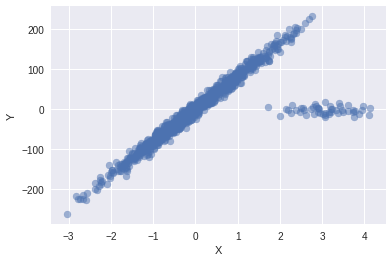

In [84]:
plt.scatter(X, y, alpha=.5)
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

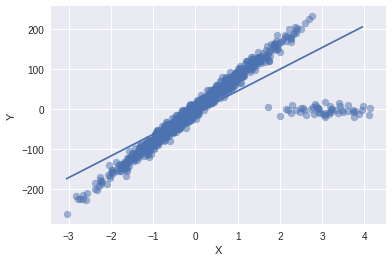

In [85]:
plt.scatter(X, y, alpha=.5)
plt.plot(line_X, line_y, label="Linear Regression fit")
plt.xlabel("X")
plt.ylabel("Y")

Text(0,0.5,'Y')

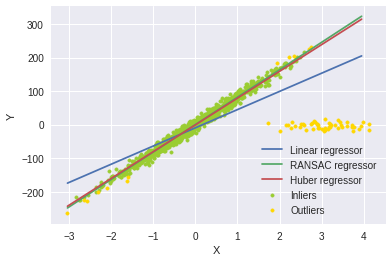

In [87]:
model_ransac = RANSACRegressor()

model_ransac.fit(X, y)
inlier_mask = model_ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)


huber = HuberRegressor().fit(X, y)

# Predecir 

line_y_ransac = model_ransac.predict(line_X)
line_y_huber = huber.predict(line_X)


plt.scatter(X[inlier_mask], y[inlier_mask], color='yellowgreen', marker='.',
            label='Inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='gold', marker='.',
            label='Outliers')
plt.plot(line_X, line_y, label='Regresion Lineal')
plt.plot(line_X, line_y_ransac, label='RANSAC regressor')
plt.plot(line_X, line_y_huber, label='Huber regressor')
plt.legend(loc='lower right')
plt.xlabel("X ")
plt.ylabel("Y")

## Decision Trees  para Regression

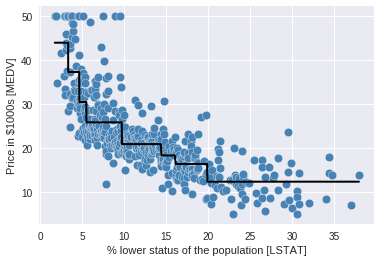

In [92]:
from sklearn.tree import DecisionTreeRegressor

X = df[['LSTAT']].values
y = df['MEDV'].values

tree = DecisionTreeRegressor(max_depth=3)
tree.fit(X, y)

sort_idx = X.flatten().argsort()

lin_regplot(X[sort_idx], y[sort_idx], tree)
plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000s [MEDV]')
plt.show()

## Random Forest  Regression

In [0]:
X = df.iloc[:, :-1].values
y = df['MEDV'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=1)

In [94]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=1000, 
                               criterion='mse', 
                               random_state=1, 
                               n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.3f, test: %.3f' % (
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.3f, test: %.3f' % (
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 1.642, test: 11.052
R^2 train: 0.979, test: 0.878


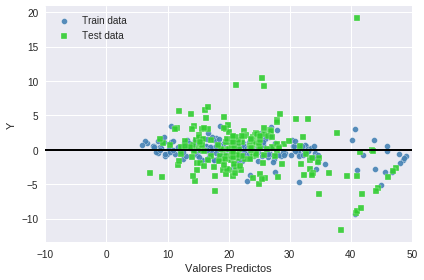

In [97]:
plt.scatter(y_train_pred,  
            y_train_pred - y_train, 
            c='steelblue',
            edgecolor='white',
            marker='o', 
            s=35,
            alpha=0.9,
            label='Train data')
plt.scatter(y_test_pred,  
            y_test_pred - y_test, 
            c='limegreen',
            edgecolor='white',
            marker='s', 
            s=35,
            alpha=0.9,
            label='Test data')

plt.xlabel('Valores Predictos')
plt.ylabel('Y')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='black')
plt.xlim([-10, 50])
plt.tight_layout()

plt.show()